## Group 10


Keshav Yadav - 0770087

Sri Sankeerth Koduru - 0768993

Dilpreet Singh - 0771612

Siva Sai Chaitanya Varma Sykam - 0770796

# Lab 4: Building an Image Classifier from Scratch

The main goal of this lab is to create an image classifier from scratch using the Keras package. You will create a binary classifier based on an object type of your choice. The classifier will accept images and then predict whether or not a given image contains that object. For example, if you chose your object to be a cat, then the classifier would accept images and predict 1 if it believes there is a cat in the image or a 0 if not.

You will build and train a classifier in two ways:
- first using the original data set that you create, and
- second, using data augmentation techniques.

**Grading:**

50% of the grade will come from error-free code that accomplishes all the steps outlined in the instructions for each part of this lab and written in Python/Keras. The other 50% will come from the comments associated with that code, where the comments explain what the code is doing and why it is important to the overall objective. Thus, comments like "split the data" or "train the model" would receive a grade of 0 as they do not indicate any understanding.

**Research Required:**

To complete this lab successfully you will need to some research. At the very least, you will need to implement the [`ImageDataGenerator` class](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) and the [`.flow_from_directory` method](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory).

**What to submit:**
- A copy of this notebook with:
    - Error-free code in Python/Keras
    - All code cells executed and output visible
- Include a zipped file of your images



## Part 1: Prep Work
### Choose an Object

**You may choose any object other than a cat**. Try to think of an object that is readily available for taking pictures and, preferably, outdoors, as that will add to the natural variability to the data.

### Create a Dataset

Take 80 pictures of the chosen object and 80 pictures of other things that are not your object. Each group member should supply a roughly equal number of pictures so as to increase variability in your dataset.

From these 160 images you will create a training set (50 object/50 not object), a validation set (15 object/15 not object), and a test set (15 object/15 not object).

It's best if your dataset is diverse, so take pictures of the chosen **object** with, for example, different lighting, from different angles, different distances from camera, different examples of the same type of object. Similarly for the **not object** images: try to include a variety of objects in different ways.

In [ ]:
# Importing Packages
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,MaxPool2D
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras import regularizers
from pathlib import Path
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Colab\ Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


## Part 2: Using the Original Data

### Dataset Verification

You should verify that the training, validation, and test sets have the correct number of images (the `os` functions should help with this) and that the data is organized in `train`, `validation`, and `test` folders.

### Dataset Loading and Processing with Image Data Generators

You should now create image data generators for your training, validation, and test datasets that will allow you to feed them into your model in batches. The images should be resized to 148x148 pixels and scaled so all pixel values are between 0 and 1.

You should then use the training data generator to print out some examples of the training images and corresponding labels.

### Create and Evaluate a Model

Build a convolutional neural network and use the validation loss and accuracy to select the best architecture and hyperparameters so that you can maximize the validation accuracy.

Any overfitting should be addressed; that is, if your model begins overfitting after epoch 3, you should not quote validation accuracy after epoch 15. And, appropriate attempts should be made to reduce/eliminate the overfitting to improve overall model generalizability.

### Report Accuracy on Test Set

Your final step is to make predictions using the test set and report the final test set accuracy.

In [ ]:
# Finding the paths of the images
def scan_folder(path, paths=[]):
  images_path = Path(path)
  for i in images_path.iterdir():
    if i.is_dir():
      scan_folder(i, paths)
    else:
      paths.append({'path': Path(i), 'category': str(i.parent)[4:].lower().strip()})
  return paths

images = scan_folder('./Lab4', [])

In [ ]:
# Creating image dataframe
images_df = pd.DataFrame(images)

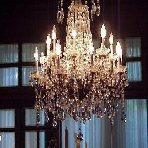

In [ ]:
# Loading the Images
images_df['img'] = images_df.path.apply(lambda path: load_img(path, target_size=(148, 148)))

images_df.img[0]

In [ ]:
# Normalizing and converting data to a numpy array
images = images_df.img.apply(lambda img: img_to_array(img, dtype='float32'))
images = images.apply(lambda img: img.astype('float32')/255)
print(images[0].shape)
images = np.array(images.to_list())

(148, 148, 3)


In [ ]:
# encoding the categories
print(images_df['category'])
categories = {label : idx for idx, label in enumerate(images_df.category.unique())}
categories
images_df.category = images_df.category.apply(lambda x: categories[x])
category = to_categorical(images_df.category)
print(category[0:5])

0       /other
1       /other
2       /other
3       /other
4       /other
        ...   
155    /object
156    /object
157    /object
158    /object
159    /object
Name: category, Length: 160, dtype: object
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
# Creating training data with 100 samples(50 of each by using the stratified method), validation data with 30 samples(15 of each by using the stratified method) and testing data(15 of each by using the stratified method)
x_train, x, y_train, y = train_test_split(images, category, test_size=0.375, random_state=411, stratify=category)
x_val, x_test, y_val, y_test = train_test_split(x, y, test_size=0.5, random_state=411, stratify=y)

In [ ]:
# Training length
len(x_train)

100

In [ ]:
# Validation length
len(x_val)

30

In [ ]:
# Testing length
len(x_test)

30

In [ ]:
# Looking at an image
x_train[1]

array([[[0.07058824, 0.02745098, 0.01176471],
        [0.06666667, 0.03137255, 0.01176471],
        [0.06666667, 0.03137255, 0.01176471],
        ...,
        [0.06666667, 0.03921569, 0.00784314],
        [0.0627451 , 0.04705882, 0.01176471],
        [0.08627451, 0.05098039, 0.03137255]],

       [[0.07450981, 0.03921569, 0.01960784],
        [0.05490196, 0.01960784, 0.        ],
        [0.0627451 , 0.02745098, 0.00784314],
        ...,
        [0.07450981, 0.04705882, 0.02352941],
        [0.06666667, 0.04705882, 0.02352941],
        [0.07843138, 0.03921569, 0.03137255]],

       [[0.05098039, 0.01568628, 0.        ],
        [0.05882353, 0.02352941, 0.00392157],
        [0.05882353, 0.02352941, 0.00392157],
        ...,
        [0.0627451 , 0.04313726, 0.01960784],
        [0.06666667, 0.04705882, 0.02352941],
        [0.07450981, 0.04313726, 0.03137255]],

       ...,

       [[0.04705882, 0.03921569, 0.        ],
        [0.04705882, 0.03921569, 0.        ],
        [0.04705882, 0

In [ ]:
# Shape of the images and categories
print(x_train.shape)
print(y_train.shape)

(100, 148, 148, 3)
(100, 2)


In [ ]:
# Creating and fitting the model
tf.random.set_seed(411)

model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(148, 148, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=15,batch_size = 10, verbose=1)

Epoch 1/15
10/10 [==============================] - 7s 688ms/step - loss: 1.0810 - accuracy: 0.5100
Epoch 2/15
10/10 [==============================] - 7s 671ms/step - loss: 0.6933 - accuracy: 0.5500
Epoch 3/15
10/10 [==============================] - 7s 668ms/step - loss: 0.6606 - accuracy: 0.5800
Epoch 4/15
10/10 [==============================] - 7s 670ms/step - loss: 0.5373 - accuracy: 0.7900
Epoch 5/15
10/10 [==============================] - 7s 673ms/step - loss: 0.3898 - accuracy: 0.8600
Epoch 6/15
10/10 [==============================] - 7s 675ms/step - loss: 0.2051 - accuracy: 0.9300
Epoch 7/15
10/10 [==============================] - 7s 670ms/step - loss: 0.2071 - accuracy: 0.9700
Epoch 8/15
10/10 [==============================] - 7s 680ms/step - loss: 0.0990 - accuracy: 0.9700
Epoch 9/15
10/10 [==============================] - 7s 679ms/step - loss: 0.0647 - accuracy: 1.0000
Epoch 10/15
10/10 [==============================] - 7s 673ms/step - loss: 0.0389 - accuracy: 0.9900

In [ ]:
# The validatioin score
valscore = model.evaluate(x_val, y_val)
print(valscore)

1/1 [==============================] - 1s 585ms/step - loss: 0.5114 - accuracy: 0.9000
[0.5114274024963379, 0.8999999761581421]


In [ ]:
# The testing score
testscore = model.evaluate(x_test, y_test)
print(testscore)

1/1 [==============================] - 0s 495ms/step - loss: 0.5720 - accuracy: 0.8333
[0.571974515914917, 0.8333333134651184]


## Part 3: Using Data Augmentation

### Dataset Verification

You should verify that the training, validation, and test sets have the correct number of images (the `os` functions should help with this) and that the data is organized in a folder structure that will work with your image data generators.

### Dataset Loading and Processing with Create Image Data Generators

You should now create image data generators for your training, validation, and test datasets that will allow you to feed them into your model in batches. The images should be resized to 148x148 pixels and scaled so all pixel values are between 0 and 1.

### Add Data Augmentation

You should now add data augmentation to your training data generator. All available types of augmentation should be used.

Print an image and examples of the same image augmented in different ways. (The `.load_img()` and [`.flow()` method](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow) may be helpful here.)

### Create and Evaluate a Baseline Model

Use the best model from **Part 2** to train with the augmented data and evaluate on the validation data to get a baseline accuracy for the new model trained on the augmented dataset.

### Tune the Model

With a more complex training set, you may be able to improve the accuracy through adjustments to the baseline model architecture and tuning the hyperparameters.

### Report Accuracy on Test Set

Your final step is to make predictions using the test set and report the final test set accuracy.

In [ ]:
# Augmentation of the data
image2 = images_df['img']
image2 = image2.apply(lambda x : img_to_array(x))
image2 = np.array(image2.to_list())
Image_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        horizontal_flip=True)
image2 = Image_generator.flow(image2, batch_size=1, seed=411)

In [ ]:
# converting data into a list
images3 = [image2.next()[0] for i in range(len(image2))]

In [ ]:
# converting data into a numpy array
images3 = np.array(images3)

In [ ]:
# shape of the new images
images3.shape

(160, 148, 148, 3)

In [ ]:
# Creating training data with 100 samples(50 of each by using the stratified method), validation data with 30 samples(15 of each by using the stratified method) and testing data(15 of each by using the stratified method)
x_train1, x1, y_train1, y1 = train_test_split(images3, category, test_size=0.375, random_state=411, stratify=category)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x1, y1, test_size=0.5, random_state=411, stratify=y1)

In [ ]:
# Looking at an image
x_train1[1]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [ ]:
# Creating and fitting the model from section 2
tf.random.set_seed(411)

model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(148, 148, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train1, y_train1, epochs=15,batch_size = 10, verbose=1)

Epoch 1/15
10/10 [==============================] - 7s 689ms/step - loss: 1.1545 - accuracy: 0.4700
Epoch 2/15
10/10 [==============================] - 7s 675ms/step - loss: 0.6935 - accuracy: 0.4200
Epoch 3/15
10/10 [==============================] - 7s 672ms/step - loss: 0.6926 - accuracy: 0.5200
Epoch 4/15
10/10 [==============================] - 7s 676ms/step - loss: 0.6926 - accuracy: 0.5100
Epoch 5/15
10/10 [==============================] - 7s 670ms/step - loss: 0.6753 - accuracy: 0.6300
Epoch 6/15
10/10 [==============================] - 7s 675ms/step - loss: 0.6483 - accuracy: 0.6700
Epoch 7/15
10/10 [==============================] - 7s 675ms/step - loss: 0.5666 - accuracy: 0.7300
Epoch 8/15
10/10 [==============================] - 7s 678ms/step - loss: 0.4429 - accuracy: 0.8300
Epoch 9/15
10/10 [==============================] - 7s 678ms/step - loss: 0.3465 - accuracy: 0.8500
Epoch 10/15
10/10 [==============================] - 7s 678ms/step - loss: 0.2419 - accuracy: 0.9300

In [ ]:
# The validatioin score
valscore1 = model.evaluate(x_val1, y_val1)
print(valscore1)

1/1 [==============================] - 1s 643ms/step - loss: 1.7701 - accuracy: 0.4667
[1.770092487335205, 0.46666666865348816]


In [ ]:
# Testing Score
testscore1 = model.evaluate(x_test1, y_test1)
print(testscore1)

1/1 [==============================] - 0s 492ms/step - loss: 1.9655 - accuracy: 0.5000
[1.965489149093628, 0.5]


In [ ]:
# Improving Model
tf.random.set_seed(411)

model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(148, 148, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train1, y_train1, epochs=12,batch_size = 10, verbose=1)

Epoch 1/12
10/10 [==============================] - 5s 475ms/step - loss: 1.0069 - accuracy: 0.3700
Epoch 2/12
10/10 [==============================] - 5s 471ms/step - loss: 0.6919 - accuracy: 0.5800
Epoch 3/12
10/10 [==============================] - 5s 466ms/step - loss: 0.6841 - accuracy: 0.6500
Epoch 4/12
10/10 [==============================] - 5s 468ms/step - loss: 0.6823 - accuracy: 0.6100
Epoch 5/12
10/10 [==============================] - 5s 468ms/step - loss: 0.6551 - accuracy: 0.6500
Epoch 6/12
10/10 [==============================] - 5s 471ms/step - loss: 0.6417 - accuracy: 0.6700
Epoch 7/12
10/10 [==============================] - 5s 471ms/step - loss: 0.6119 - accuracy: 0.7200
Epoch 8/12
10/10 [==============================] - 5s 471ms/step - loss: 0.5398 - accuracy: 0.7200
Epoch 9/12
10/10 [==============================] - 5s 470ms/step - loss: 0.4651 - accuracy: 0.8300
Epoch 10/12
10/10 [==============================] - 5s 468ms/step - loss: 0.4198 - accuracy: 0.8900

In [ ]:
# The validatioin score
valscore2 = model.evaluate(x_val1, y_val1)
print(valscore2)

1/1 [==============================] - 0s 441ms/step - loss: 0.9888 - accuracy: 0.3667
[0.9887588024139404, 0.36666667461395264]


In [ ]:
# Testing Score
testscore2 = model.evaluate(x_test1, y_test1)
print(testscore2)

1/1 [==============================] - 0s 314ms/step - loss: 0.8286 - accuracy: 0.6000
[0.8285781741142273, 0.6000000238418579]


##### The test set before after augmentation is 83.33%
##### The test set accuracy after augmentation with the part 2 code is 50%
##### The final test set accuracy after augmentation is 60%